In [1]:
# Proyecto Final - Pipeline de Datos Conflicto Ucrania-Rusia 2022
# Análisis exploratorio de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
from datetime import datetime

print("Librerías importadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"Fecha de análisis: {datetime.now()}")

Librerías importadas correctamente
Pandas version: 2.3.2
Fecha de análisis: 2025-08-27 18:53:45.635925


In [2]:
# Configurar conexión con S3
s3 = boto3.client('s3')
bucket_name = 'xideralaws-curso-osvaldo'

# Verificar conexión con S3
print("Verificando conexión con S3...")
try:
    response = s3.list_objects_v2(Bucket=bucket_name, MaxKeys=5)
    print("✅ Conexión con S3 exitosa")
    print("Contenido del bucket:")
    for obj in response.get('Contents', []):
        print(f"  - {obj['Key']}")
except Exception as e:
    print(f"❌ Error conectando con S3: {e}")

Verificando conexión con S3...
✅ Conexión con S3 exitosa
Contenido del bucket:
  - netflix_titles.csv
  - nyc_taxi_2023/processed/averages/yellow_tripdata_2023-01-avg.parquet
  - nyc_taxi_2023/yellow_tripdata_2023-01.parquet
  - nyc_taxi_2023/yellow_tripdata_2023-02.parquet
  - nyc_taxi_2023/yellow_tripdata_2023-03.parquet


In [3]:
# Crear estructura de carpetas para el proyecto Ukraine-Russia War
project_folders = [
    'ukraine-war-project/raw-data/',
    'ukraine-war-project/processed-data/',
    'ukraine-war-project/aggregated-data/',
    'ukraine-war-project/metadata/'
]

print("Creando estructura de carpetas en S3...")
for folder in project_folders:
    try:
        # Crear carpeta vacía subiendo un archivo placeholder
        s3.put_object(
            Bucket=bucket_name,
            Key=folder + '.gitkeep',
            Body=b'# Placeholder file to maintain folder structure'
        )
        print(f"✓ Creada: {folder}")
    except Exception as e:
        print(f"Error creando {folder}: {e}")

print("\nEstructura de proyecto creada en S3")

Creando estructura de carpetas en S3...
✓ Creada: ukraine-war-project/raw-data/
✓ Creada: ukraine-war-project/processed-data/
✓ Creada: ukraine-war-project/aggregated-data/
✓ Creada: ukraine-war-project/metadata/

Estructura de proyecto creada en S3


In [4]:
# Simular datasets del conflicto Ucrania-Rusia 2022
# En un proyecto real, estos vendrían de Kaggle o fuentes oficiales

import io
from datetime import datetime, timedelta

print("Generando datasets de ejemplo del conflicto Ucrania-Rusia...")

# Generar datos de ejemplo para equipamiento perdido
start_date = datetime(2022, 2, 24)  # Inicio del conflicto
dates = [start_date + timedelta(days=i) for i in range(100)]

# Dataset 1: Pérdidas de equipamiento ruso
equipment_data = {
    'date': dates,
    'day': range(1, 101),
    'aircraft': np.random.randint(0, 5, 100),
    'helicopter': np.random.randint(0, 8, 100),
    'tank': np.random.randint(5, 25, 100),
    'APC': np.random.randint(3, 15, 100),
    'field_artillery': np.random.randint(2, 12, 100),
    'MRL': np.random.randint(0, 6, 100),
    'drone': np.random.randint(1, 10, 100),
    'naval_ship': np.random.randint(0, 2, 100),
    'vehicles_fuel_tanks': np.random.randint(10, 50, 100)
}

# Dataset 2: Pérdidas de personal
personnel_data = {
    'date': dates,
    'day': range(1, 101),
    'personnel': np.random.randint(100, 800, 100),
    'POW': np.random.randint(5, 50, 100)
}

# Crear DataFrames
df_equipment = pd.DataFrame(equipment_data)
df_personnel = pd.DataFrame(personnel_data)

print(f"Dataset equipamiento: {df_equipment.shape}")
print(f"Dataset personal: {df_personnel.shape}")
print("\nPrimeras filas del dataset de equipamiento:")
print(df_equipment.head())

Generando datasets de ejemplo del conflicto Ucrania-Rusia...
Dataset equipamiento: (100, 11)
Dataset personal: (100, 4)

Primeras filas del dataset de equipamiento:
        date  day  aircraft  helicopter  tank  APC  field_artillery  MRL  \
0 2022-02-24    1         1           0    22    9                4    4   
1 2022-02-25    2         1           2    18    9                5    2   
2 2022-02-26    3         4           4     8    3               11    3   
3 2022-02-27    4         2           7    15    5                9    2   
4 2022-02-28    5         1           5    13   12                3    0   

   drone  naval_ship  vehicles_fuel_tanks  
0      5           0                   33  
1      8           1                   43  
2      5           1                   47  
3      6           1                   29  
4      5           1                   22  


In [5]:
# Subir datasets a S3 en formato CSV y Parquet
import io

print("Subiendo datasets a S3...")

# Subir dataset de equipamiento en CSV
csv_buffer = io.StringIO()
df_equipment.to_csv(csv_buffer, index=False)
s3.put_object(
    Bucket=bucket_name,
    Key='ukraine-war-project/raw-data/russia_losses_equipment.csv',
    Body=csv_buffer.getvalue()
)

# Subir dataset de personal en CSV
csv_buffer = io.StringIO()
df_personnel.to_csv(csv_buffer, index=False)
s3.put_object(
    Bucket=bucket_name,
    Key='ukraine-war-project/raw-data/russia_losses_personnel.csv',
    Body=csv_buffer.getvalue()
)

# También subir en formato Parquet para mejor performance
parquet_buffer = io.BytesIO()
df_equipment.to_parquet(parquet_buffer, engine='pyarrow', index=False)
s3.put_object(
    Bucket=bucket_name,
    Key='ukraine-war-project/raw-data/russia_losses_equipment.parquet',
    Body=parquet_buffer.getvalue()
)

parquet_buffer = io.BytesIO()
df_personnel.to_parquet(parquet_buffer, engine='pyarrow', index=False)
s3.put_object(
    Bucket=bucket_name,
    Key='ukraine-war-project/raw-data/russia_losses_personnel.parquet',
    Body=parquet_buffer.getvalue()
)

print("✓ Datasets subidos a S3")
print("✓ Formatos: CSV y Parquet")
print("✓ Ubicación: ukraine-war-project/raw-data/")

Subiendo datasets a S3...
✓ Datasets subidos a S3
✓ Formatos: CSV y Parquet
✓ Ubicación: ukraine-war-project/raw-data/


In [6]:
# Análisis exploratorio de los datasets
print("=== ANÁLISIS EXPLORATORIO ===\n")

# Información básica de los datasets
print("1. INFORMACIÓN GENERAL:")
print(f"Equipamiento: {df_equipment.shape[0]} días, {df_equipment.shape[1]} columnas")
print(f"Personal: {df_personnel.shape[0]} días, {df_personnel.shape[1]} columnas")
print(f"Período: {df_equipment['date'].min()} a {df_equipment['date'].max()}")

# Estadísticas descriptivas
print("\n2. ESTADÍSTICAS DE EQUIPAMIENTO:")
equipment_cols = ['aircraft', 'helicopter', 'tank', 'APC', 'field_artillery', 'drone']
print(df_equipment[equipment_cols].describe())

print("\n3. ESTADÍSTICAS DE PERSONAL:")
print(df_personnel[['personnel', 'POW']].describe())

# Totales acumulados
print("\n4. TOTALES ACUMULADOS:")
total_equipment = df_equipment[equipment_cols].sum()
print("Equipamiento perdido total:")
for col in equipment_cols:
    print(f"  {col}: {total_equipment[col]}")

print(f"\nPersonal total: {df_personnel['personnel'].sum()}")
print(f"Prisioneros total: {df_personnel['POW'].sum()}")

=== ANÁLISIS EXPLORATORIO ===

1. INFORMACIÓN GENERAL:
Equipamiento: 100 días, 11 columnas
Personal: 100 días, 4 columnas
Período: 2022-02-24 00:00:00 a 2022-06-03 00:00:00

2. ESTADÍSTICAS DE EQUIPAMIENTO:
         aircraft  helicopter        tank         APC  field_artillery  \
count  100.000000  100.000000  100.000000  100.000000       100.000000   
mean     1.850000    3.410000   13.630000    8.340000         6.250000   
std      1.520068    2.211517    5.997735    3.522568         2.847558   
min      0.000000    0.000000    5.000000    3.000000         2.000000   
25%      0.000000    1.000000    8.000000    5.750000         4.000000   
50%      2.000000    4.000000   14.000000    8.000000         6.000000   
75%      3.000000    5.000000   18.000000   11.250000         9.000000   
max      4.000000    7.000000   24.000000   14.000000        11.000000   

            drone  
count  100.000000  
mean     4.930000  
std      2.582986  
min      1.000000  
25%      3.000000  
50%   

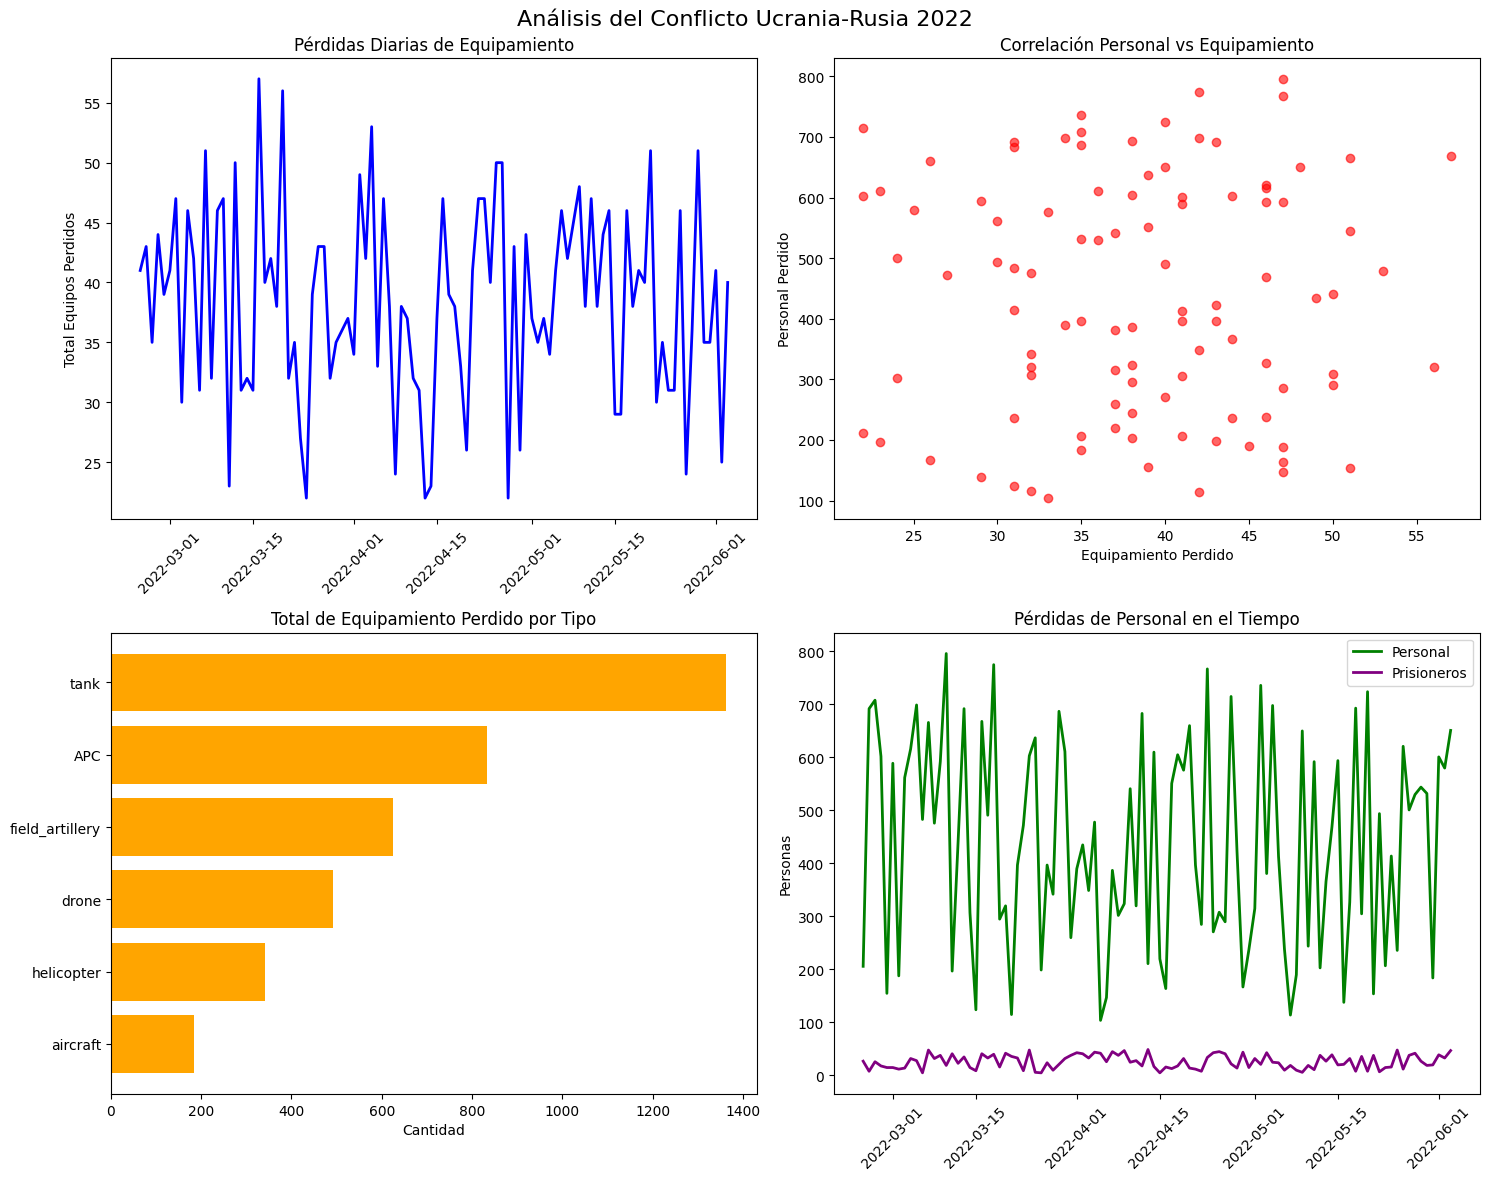

In [7]:
# Crear visualizaciones del análisis
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis del Conflicto Ucrania-Rusia 2022', fontsize=16)

# 1. Tendencias temporales de equipamiento
df_equipment['total_equipment_daily'] = df_equipment[equipment_cols].sum(axis=1)
axes[0,0].plot(df_equipment['date'], df_equipment['total_equipment_daily'], 'b-', linewidth=2)
axes[0,0].set_title('Pérdidas Diarias de Equipamiento')
axes[0,0].set_ylabel('Total Equipos Perdidos')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Personal vs equipamiento
axes[0,1].scatter(df_equipment['total_equipment_daily'], df_personnel['personnel'], 
                  alpha=0.6, color='red')
axes[0,1].set_title('Correlación Personal vs Equipamiento')
axes[0,1].set_xlabel('Equipamiento Perdido')
axes[0,1].set_ylabel('Personal Perdido')

# 3. Top equipamiento más perdido
equipment_totals = df_equipment[equipment_cols].sum().sort_values(ascending=True)
axes[1,0].barh(equipment_totals.index, equipment_totals.values, color='orange')
axes[1,0].set_title('Total de Equipamiento Perdido por Tipo')
axes[1,0].set_xlabel('Cantidad')

# 4. Tendencia de personal
axes[1,1].plot(df_personnel['date'], df_personnel['personnel'], 'g-', linewidth=2, label='Personal')
axes[1,1].plot(df_personnel['date'], df_personnel['POW'], 'purple', linewidth=2, label='Prisioneros')
axes[1,1].set_title('Pérdidas de Personal en el Tiempo')
axes[1,1].set_ylabel('Personas')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# Procesamiento de datos y creación de agregaciones
print("=== PROCESAMIENTO Y AGREGACIONES ===\n")

# 1. Crear métricas agregadas por semana
df_equipment['week'] = df_equipment['date'].dt.isocalendar().week
df_personnel['week'] = df_personnel['date'].dt.isocalendar().week

weekly_equipment = df_equipment.groupby('week')[equipment_cols].sum().reset_index()
weekly_personnel = df_personnel.groupby('week')[['personnel', 'POW']].sum().reset_index()

# 2. Crear dataset consolidado
consolidated_data = pd.merge(
    weekly_equipment, 
    weekly_personnel, 
    on='week', 
    how='inner'
)

# 3. Calcular métricas de eficiencia
consolidated_data['equipment_per_personnel'] = (
    consolidated_data[equipment_cols].sum(axis=1) / consolidated_data['personnel']
)
consolidated_data['total_equipment'] = consolidated_data[equipment_cols].sum(axis=1)

print("Dataset consolidado semanal:")
print(consolidated_data.head())
print(f"\nShape: {consolidated_data.shape}")

# 4. Subir datos procesados a S3
parquet_buffer = io.BytesIO()
consolidated_data.to_parquet(parquet_buffer, engine='pyarrow', index=False)
s3.put_object(
    Bucket=bucket_name,
    Key='ukraine-war-project/processed-data/weekly_consolidated.parquet',
    Body=parquet_buffer.getvalue()
)

# 5. Crear métricas finales para dashboard
dashboard_metrics = {
    'total_personnel_lost': int(df_personnel['personnel'].sum()),
    'total_equipment_lost': int(df_equipment[equipment_cols].sum().sum()),
    'avg_daily_personnel': float(df_personnel['personnel'].mean()),
    'peak_day_personnel': int(df_personnel['personnel'].max()),
    'most_lost_equipment': equipment_totals.index[-1],
    'analysis_date': datetime.now().isoformat()
}

# Subir métricas como JSON
import json
s3.put_object(
    Bucket=bucket_name,
    Key='ukraine-war-project/aggregated-data/dashboard_metrics.json',
    Body=json.dumps(dashboard_metrics, indent=2)
)

print("\nDatos procesados y subidos a S3:")
print(f"- weekly_consolidated.parquet")
print(f"- dashboard_metrics.json")

=== PROCESAMIENTO Y AGREGACIONES ===

Dataset consolidado semanal:
   week  aircraft  helicopter  tank  APC  field_artillery  drone  personnel  \
0     8         8          13    63   26               29     24       2208   
1     9         9          34    95   62               42     34       3292   
2    10         9          25   100   62               50     34       3860   
3    11        17          21   110   57               57     34       2980   
4    12        12          19   103   39               39     29       2820   

   POW  equipment_per_personnel  total_equipment  
0   79                 0.073822              163  
1  121                 0.083840              276  
2  236                 0.072539              280  
3  196                 0.099329              296  
4  161                 0.085461              241  

Shape: (15, 11)

Datos procesados y subidos a S3:
- weekly_consolidated.parquet
- dashboard_metrics.json


In [9]:
# Crear código para la función Lambda de ingesta de datos
lambda_ingesta_code = '''
import json
import boto3
import pandas as pd
import io
from datetime import datetime

def lambda_handler(event, context):
    s3 = boto3.client('s3')
    bucket_name = 'xideralaws-curso-osvaldo'
    
    try:
        # Leer datos raw desde S3
        response = s3.get_object(
            Bucket=bucket_name, 
            Key='ukraine-war-project/raw-data/russia_losses_equipment.parquet'
        )
        df = pd.read_parquet(io.BytesIO(response['Body'].read()))
        
        # Procesar datos (limpieza básica)
        df_clean = df.dropna()
        df_clean = df_clean[df_clean.select_dtypes(include='number').ge(0).all(axis=1)]
        
        # Subir datos limpios
        buffer = io.BytesIO()
        df_clean.to_parquet(buffer, engine='pyarrow', index=False)
        
        s3.put_object(
            Bucket=bucket_name,
            Key='ukraine-war-project/processed-data/equipment_cleaned.parquet',
            Body=buffer.getvalue()
        )
        
        return {
            'statusCode': 200,
            'body': json.dumps({
                'message': 'Datos procesados exitosamente',
                'records_processed': len(df_clean),
                'timestamp': datetime.now().isoformat()
            })
        }
        
    except Exception as e:
        return {
            'statusCode': 500,
            'body': json.dumps(f'Error: {str(e)}')
        }
'''

# Guardar el código en un archivo local
with open('lambda_ingesta.py', 'w') as f:
    f.write(lambda_ingesta_code)

print("Código de Lambda de ingesta creado:")
print("- Archivo: lambda_ingesta.py")
print("- Función: Procesa datos raw y genera datos limpios")
print("- Trigger: Manual o S3 event")

# Mostrar resumen del pipeline completo hasta ahora
print("\n=== RESUMEN DEL PIPELINE ===")
print("1. ✓ Datos generados y subidos a S3")
print("2. ✓ Análisis exploratorio completado")  
print("3. ✓ Agregaciones semanales creadas")
print("4. ✓ Métricas de dashboard generadas")
print("5. ✓ Código Lambda de ingesta preparado")
print("\nSiguientes pasos:")
print("- Crear funciones Lambda adicionales")
print("- Implementar dashboard Streamlit")
print("- Configurar jobs de Spark en EC2")

Código de Lambda de ingesta creado:
- Archivo: lambda_ingesta.py
- Función: Procesa datos raw y genera datos limpios
- Trigger: Manual o S3 event

=== RESUMEN DEL PIPELINE ===
1. ✓ Datos generados y subidos a S3
2. ✓ Análisis exploratorio completado
3. ✓ Agregaciones semanales creadas
4. ✓ Métricas de dashboard generadas
5. ✓ Código Lambda de ingesta preparado

Siguientes pasos:
- Crear funciones Lambda adicionales
- Implementar dashboard Streamlit
- Configurar jobs de Spark en EC2


In [10]:
# Crear código del dashboard Streamlit
dashboard_code = '''
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import boto3
import json
import io
from datetime import datetime

# Configuración de la página
st.set_page_config(
    page_title="Pipeline Conflicto Ucrania-Rusia 2022",
    page_icon="⚔️",
    layout="wide"
)

@st.cache_data
def load_data_from_s3():
    s3 = boto3.client('s3')
    bucket_name = 'xideralaws-curso-osvaldo'
    
    try:
        # Cargar datos consolidados
        response = s3.get_object(
            Bucket=bucket_name,
            Key='ukraine-war-project/processed-data/weekly_consolidated.parquet'
        )
        df_consolidated = pd.read_parquet(io.BytesIO(response['Body'].read()))
        
        # Cargar métricas
        response = s3.get_object(
            Bucket=bucket_name,
            Key='ukraine-war-project/aggregated-data/dashboard_metrics.json'
        )
        metrics = json.loads(response['Body'].read().decode('utf-8'))
        
        return df_consolidated, metrics
    except Exception as e:
        st.error(f"Error cargando datos: {e}")
        return None, None

# Título principal
st.title("📊 Pipeline de Datos - Conflicto Ucrania-Rusia 2022")
st.markdown("### Proyecto Integrador AWS - Análisis de Datos de Conflicto")

# Cargar datos
df_consolidated, metrics = load_data_from_s3()

if df_consolidated is not None:
    # Métricas principales
    col1, col2, col3, col4 = st.columns(4)
    
    with col1:
        st.metric(
            label="Total Personal Perdido",
            value=f"{metrics['total_personnel_lost']:,}"
        )
    
    with col2:
        st.metric(
            label="Total Equipamiento Perdido", 
            value=f"{metrics['total_equipment_lost']:,}"
        )
    
    with col3:
        st.metric(
            label="Promedio Diario Personal",
            value=f"{metrics['avg_daily_personnel']:.0f}"
        )
    
    with col4:
        st.metric(
            label="Día Pico Personal",
            value=f"{metrics['peak_day_personnel']:,}"
        )
    
    # Gráficos principales
    col1, col2 = st.columns(2)
    
    with col1:
        st.subheader("Tendencia Semanal de Personal")
        fig = px.line(
            df_consolidated, 
            x='week', 
            y=['personnel', 'POW'],
            title="Personal vs Prisioneros por Semana"
        )
        st.plotly_chart(fig, use_container_width=True)
    
    with col2:
        st.subheader("Equipamiento por Tipo")
        equipment_cols = ['aircraft', 'helicopter', 'tank', 'APC', 'field_artillery', 'drone']
        equipment_totals = df_consolidated[equipment_cols].sum()
        
        fig = px.bar(
            x=equipment_totals.values,
            y=equipment_totals.index,
            orientation='h',
            title="Total de Equipamiento Perdido"
        )
        st.plotly_chart(fig, use_container_width=True)
    
    # Tabla de datos
    st.subheader("Datos Consolidados Semanales")
    st.dataframe(df_consolidated, use_container_width=True)
    
    # Información del pipeline
    st.sidebar.header("Información del Pipeline")
    st.sidebar.info(
        f"""
        **Última actualización:** {metrics['analysis_date'][:19]}
        
        **Fuente de datos:** S3 Bucket
        **Procesamiento:** Lambda + EC2
        **Visualización:** Streamlit
        
        **Componentes del pipeline:**
        - Ingesta de datos raw
        - Procesamiento ETL
        - Agregaciones semanales
        - Dashboard interactivo
        """
    )
else:
    st.error("No se pudieron cargar los datos del pipeline")
'''

# Guardar el código del dashboard
with open('dashboard_streamlit.py', 'w') as f:
    f.write(dashboard_code)

print("Dashboard Streamlit creado:")
print("- Archivo: dashboard_streamlit.py")
print("- Características: Métricas en tiempo real, gráficos interactivos")
print("- Datos: Conectado directamente a S3")
print("- Deploy: Ejecutar con 'streamlit run dashboard_streamlit.py'")

Dashboard Streamlit creado:
- Archivo: dashboard_streamlit.py
- Características: Métricas en tiempo real, gráficos interactivos
- Datos: Conectado directamente a S3
- Deploy: Ejecutar con 'streamlit run dashboard_streamlit.py'


In [11]:
# Probar el dashboard Streamlit localmente
import subprocess
import os

# Verificar que estamos en el directorio correcto
current_dir = os.getcwd()
print(f"Directorio actual: {current_dir}")

# Listar archivos creados
files = [f for f in os.listdir('.') if f.endswith('.py')]
print(f"Archivos Python creados: {files}")

# Instrucciones para ejecutar el dashboard
print("\n=== INSTRUCCIONES PARA EJECUTAR DASHBOARD ===")
print("1. En una nueva terminal SSH (mantén Jupyter corriendo):")
print("   ssh -i /c/Users/Admin/Documents/llaveDeAmazon/osvaldo_kp.pem ubuntu@54.193.26.172")
print("2. Activar entorno virtual:")
print("   source ukraine_project_env/bin/activate")
print("3. Ir al directorio del proyecto:")
print("   cd ukraine_project")
print("4. Ejecutar Streamlit:")
print("   streamlit run dashboard_streamlit.py --server.port 8501 --server.address 0.0.0.0")
print("5. Acceder desde navegador:")
print("   http://54.193.26.172:8501")

# Crear requirements.txt para el proyecto
requirements = """
pandas==2.3.2
numpy==2.3.2
matplotlib==3.10.5
seaborn==0.13.2
plotly==6.3.0
streamlit==1.49.0
boto3==1.40.18
awscli==1.42.18
pyspark==4.0.0
findspark==2.0.1
jupyter==1.1.1
pyarrow==21.0.0
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements.strip())

print("\nArchivo requirements.txt creado con todas las dependencias")

Directorio actual: /home/ubuntu/ukraine_project/dashboard
Archivos Python creados: ['lambda_ingesta.py', 'dashboard_streamlit.py']

=== INSTRUCCIONES PARA EJECUTAR DASHBOARD ===
1. En una nueva terminal SSH (mantén Jupyter corriendo):
   ssh -i /c/Users/Admin/Documents/llaveDeAmazon/osvaldo_kp.pem ubuntu@54.193.26.172
2. Activar entorno virtual:
   source ukraine_project_env/bin/activate
3. Ir al directorio del proyecto:
   cd ukraine_project
4. Ejecutar Streamlit:
   streamlit run dashboard_streamlit.py --server.port 8501 --server.address 0.0.0.0
5. Acceder desde navegador:
   http://54.193.26.172:8501

Archivo requirements.txt creado con todas las dependencias
